In [ ]:
import os
import sys
import urllib.request

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [ ]:
pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 23.5 MB/s 


In [ ]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
dataset = "https://drive.google.com/file/d/1uZ7JmQ2OwP_uQYvvOkexB6OxzypccZot/view?usp=sharing"

In [ ]:
dataset

'https://drive.google.com/file/d/1uZ7JmQ2OwP_uQYvvOkexB6OxzypccZot/view?usp=sharing'


Computing Betweenness Centrality Among the Individuals for :- 
Graph with 2837 nodes and 8502 edges
	 Parallel Version (where one friend is sending the post to his/her closest friend) 
		Time : 61.2200 seconds
		Betweenness Centrality for node 0: 0.10667
	Non-Parallel Version (where one friend is sending post to other likeable post users not his/her close friend)
		Time: 65.9797 seconds
		Betweenness Centrality for node 0: 0.10667

Computing Betweenness Centrality Among the Individuals for :- 
Graph with 2837 nodes and 39993 edges
	 Parallel Version (where one friend is sending the post to his/her closest friend) 
		Time : 109.4727 seconds
		Betweenness Centrality for node 0: 0.00068
	Non-Parallel Version (where one friend is sending post to other likeable post users not his/her close friend)
		Time: 108.6969 seconds
		Betweenness Centrality for node 0: 0.00068

Computing Betweenness Centrality Among the Individuals for :- 
Graph with 2837 nodes and 5674 edges
	 Parallel Version (wher

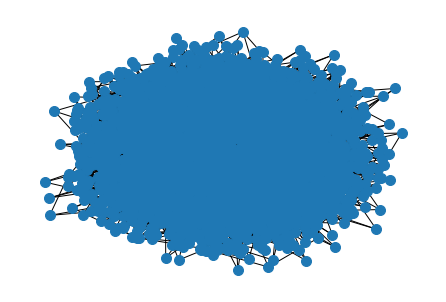

In [ ]:
from multiprocessing import Pool
import time
import itertools

import matplotlib.pyplot as plt
import networkx as nx


def parts(l, n):
    """Divide a list of nodes `l` in `n` parts"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def betweenness_centrality_parallel(G, processes=None):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool) * 4
    node_parts = list(parts(G.nodes(), G.order() // node_divisor))
    num_parts = len(node_parts)
    bt_sc = p.starmap(
        nx.betweenness_centrality_subset,
        zip(
            [G] * num_parts,
            node_parts,
            [list(G)] * num_parts,
            [True] * num_parts,
            [None] * num_parts,
        ),
    )

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c


G_ba = nx.barabasi_albert_graph(2837, 3)
G_er = nx.gnp_random_graph(2837, 0.01)
G_ws = nx.connected_watts_strogatz_graph(2837, 4, 0.1)
for G in [G_ba, G_er, G_ws]:
    print("")
    print("Computing Betweenness Centrality Among the Individuals for :- ")
    print(nx.info(G))
    print("\t Parallel Version (where one friend is sending the post to his/her closest friend) ")
    start = time.time()
    bt = betweenness_centrality_parallel(G)
    print(f"\t\tTime : {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness Centrality for node 0: {bt[0]:.5f}")
    print("\tNon-Parallel Version (where one friend is sending post to other likeable post users not his/her close friend)")
    start = time.time()
    bt = nx.betweenness_centrality(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness Centrality for node 0: {bt[0]:.5f}")
print("")

nx.draw(G_ba, node_size=100)
plt.show()


In [ ]:
import math

import matplotlib.pyplot as plt
import networkx as nx


def progressive_widening_search(G, source, value, condition, initial_width=1):
    """Progressive widening beam search to find a node.

    The progressive widening beam search involves a repeated beam
    search, starting with a small beam width then extending to
    progressively larger beam widths if the target node is not
    found. This implementation simply returns the first node found that
    matches the termination condition.

    `G` is a NetworkX graph.

    `source` is a node in the graph. The search for the node of interest
    begins here and extends only to those nodes in the (weakly)
    connected component of this node.

    `value` is a function that returns a real number indicating how good
    a potential neighbor node is when deciding which neighbor nodes to
    enqueue in the breadth-first search. Only the best nodes within the
    current beam width will be enqueued at each step.

    `condition` is the termination condition for the search. This is a
    function that takes a node as input and return a Boolean indicating
    whether the node is the target. If no node matches the termination
    condition, this function raises :exc:`NodeNotFound`.

    `initial_width` is the starting beam width for the beam search (the
    default is one). If no node matching the `condition` is found with
    this beam width, the beam search is restarted from the `source` node
    with a beam width that is twice as large (so the beam width
    increases exponentially). The search terminates after the beam width
    exceeds the number of nodes in the graph.

    """
    # Check for the special case in which the source node satisfies the
    # termination condition.
    if condition(source):
        return source
    # The largest possible value of `i` in this range yields a width at
    # least the number of nodes in the graph, so the final invocation of
    # `bfs_beam_edges` is equivalent to a plain old breadth-first
    # search. Therefore, all nodes will eventually be visited.
    log_m = math.ceil(math.log2(len(G)))
    for i in range(log_m):
        width = initial_width * pow(2, i)
        # Since we are always starting from the same source node, this
        # search may visit the same nodes many times (depending on the
        # implementation of the `value` function).
        for u, v in nx.bfs_beam_edges(G, source, value, width):
            if condition(v):
                return v
    # At this point, since all nodes have been visited, we know that
    # none of the nodes satisfied the termination condition.
    raise nx.NodeNotFound("no node satisfied the termination condition")

found node 9 with centrality 0.11994997864273817


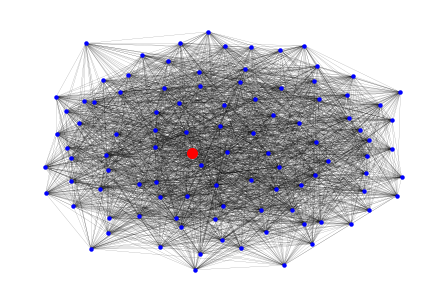

In [ ]:
# Set a seed for random number generation so the example is reproducible
seed = 23

G = nx.gnp_random_graph(100, 0.5, seed=seed)
centrality = nx.eigenvector_centrality(G)
avg_centrality = sum(centrality.values()) / len(G)


def has_high_centrality(v):
    return centrality[v] >= avg_centrality


source = 0
value = centrality.get
condition = has_high_centrality

found_node = progressive_widening_search(G, source, value, condition)
c = centrality[found_node]
print(f"found node {found_node} with centrality {c}")


# Draw graph
pos = nx.spring_layout(G, seed=seed)
options = {
    "node_color": "blue",
    "node_size": 20,
    "edge_color": "black",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(G, pos, **options)
# Draw node with high centrality as large and red
nx.draw_networkx_nodes(G, pos, nodelist=[found_node], node_size=100, node_color="r")
plt.show()